# Diabetes Classification

## DataSet Information:
<p align='center'>
	<img  width='100%' src='https://img001.prntscr.com/file/img001/VdL8n7JfSL-Xi0Wsw-xaFg.png' alt='Sumber: https://www.kaggle.com/datasets/mathchi/diabetes-data-set'>
</p>

| Jenis | Keterangan |
| - | - |
| Original owners | National Institute of Diabetes and Digestive and Kidney Diseases |
| Sumber | [Kaggle Dataset : Diabetes](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) |
| Jenis dan Ukuran Berkas | CSV (23.87 kB) |
| Rating Penggunaan | 10.0 (Gold) |
| Lisensi | CC0: Public Domain |

Penjelasan mengenai variabel-variable pada data diabetes dapat dilihat pada poin-poin berikut:

- `Pregnancies`: Jumlah berapa kali hamil
- `Glucose`: Konsentrasi glukosa plasma 2 jam dalam tes toleransi glukosa oral
- `BloodPressure`: Tekanan darah diastolik (mm Hg)
- `SkinThickness`: Ketebalan lipatan kulit trisep (mm)
- `Insulin`: Insulin serum 2 Jam (mu U/ml)
- `BMI`: Indeks massa tubuh (berat dalam kg/(tinggi dalam m)^2)
- `DiabetesPedigreeFunction`: Fungsi silsilah diabetes
- `Age`: Usia (tahun)
- `Outcome`: Variabel kelas (0 atau 1) yang menandakan diabetes atau tidak

## Import Dataset

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'lanaahm'
os.environ['KAGGLE_KEY'] = 'c5dac849baf021db5db739062fdf3105'

In [ ]:
!kaggle datasets download -d mathchi/diabetes-data-set

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 7.96MB/s]


In [ ]:
!unzip /content/diabetes-data-set.zip

Archive:  /content/diabetes-data-set.zip
  inflating: diabetes.csv            


## Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report

## EDA (Exploratory Data Analysis)

### Convert Dataset into pandas

In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Check column description

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Check Missing Value

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Check the description of dataset statistics

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Dapat dilihat pada tabel diatas bawah ada beberapa data yang memiliki nilai 0 seperti pada data `Glucose`, `BloodPressure`, dan `BMI` yang merupakan data tersebut tidak mungkin memiliki nilai 0 untuk mengatasi masalah tersebut dapat dilakukan pengisian data.


In [ ]:
ZeroGlucose = (df.Glucose == 0).sum()
ZeroBloodPressure = (df.BloodPressure == 0).sum()
ZeroBMI = (df.BMI == 0).sum()
 
print("Nilai 0 di kolom Glucose ada: ", ZeroGlucose)
print("Nilai 0 di kolom BloodPressure ada: ", ZeroBloodPressure)
print("Nilai 0 di kolom BMI ada: ", ZeroBMI)

Nilai 0 di kolom Glucose ada:  5
Nilai 0 di kolom BloodPressure ada:  35
Nilai 0 di kolom BMI ada:  11


Nilai kosong pada data `Glucose` dan `BloodPressure` akan dilakukan pengisian nilai dengan yang sering keluar atau modus sedangkan pada data `BMI` diisi dengan nilai rata-rata atau maen.

In [ ]:
df['Glucose'].replace(0, df.Glucose.mode()[0], inplace=True)
df['BloodPressure'].replace(0, df.BloodPressure.mode()[0], inplace=True)

df['BMI'].replace(0, df.BMI.mean(), inplace=True)

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.539062,72.295573,20.536458,79.799479,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.490660,12.106756,15.952218,115.244002,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Hasil dari pengisian data dapat dilihat pada tabel diatas nilai minimal pada data `Glucose`, `BloodPressure`, dan `BMI` bukan bernilai 0

### Outliers Analysis

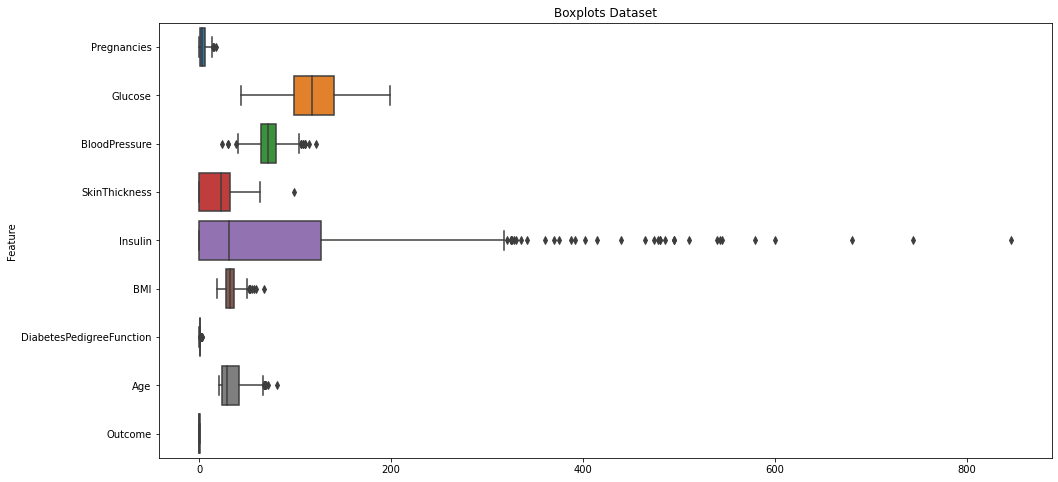

In [ ]:
plt.figure(figsize=(16, 8))
plt.title('Boxplots Dataset')

sns.boxplot(y='Feature', x='', data=df.melt(var_name='Feature', value_name=''))

### Handles outliers with IQR method

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1

df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
df.shape

(675, 9)

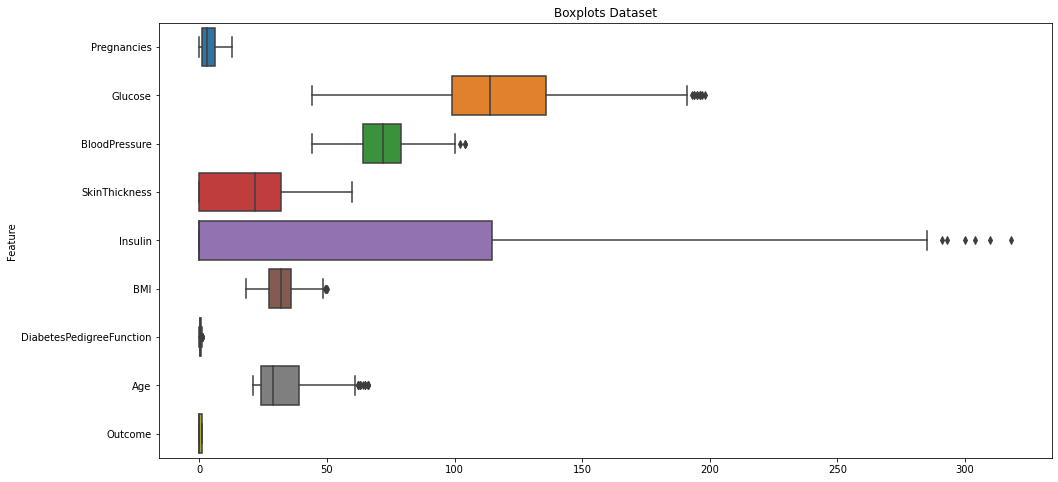

In [ ]:
plt.figure(figsize=(16, 8))
plt.title('Boxplots Dataset')

sns.boxplot(y='Feature', x='', data=df.melt(var_name='Feature', value_name=''))

Dari visualisasi Blox Plot diatas dapat dilihat masih banyak fitur data yang mengalami outlier dikarenakan data tersebut seharunya data yang memiliki range kategori kategori.

## Feature Engineering

### Converting data into categories
Dari dataset diabetes yang digunakan pada proyek ini memiliki beberapa fitur data yang meruapakan data kategori namun masih dalam bentuk numerik sehingga beberapa data tersebut mengalami outliers beberapa fitur tersebut antara lain:. 
- `Glucose`: Artikel "Glucose Tolerance Testing: Reference Range, Interpretation, Collection and Panels" menjelaskan bahwa glucose tolerance digunakan untuk mengevaluasi kemampuan untuk mengatur metabolisme glukosa dan diindikasikan ketika tes glukosa darah untuk dilakukan diagnosis. Fitur Glucose pada dataset ini adalah data numerik dengan range Konsentrasi glukosa plasma 2 jam nilai numerik tersebut sudah ditentukan pada setiap kategori seperti yang dijelaskan pada artikel<a href="#ref1">[1]</a>.
- `BloodPressure`: Artikel "High Blood Pressure Symptoms and Causes" mejelaskan bahwa tekanan darah akan berubah sepanjang hari berdasarkan aktivitas yang dilakukan. fitur BloodPressure pada dataset ini adalah data numerik. Nilai numerik tersebut sudah ditentukan pada setiap kategori seperti yang sudah dijelaskan dalam artikel<a href="#ref4">[4]</a>.
- `Insulin`: Artikel "Insulin: Reference Range, Interpretation, Collection and Panels" menjelaskan bahwa Insulin adalah hormon anabolik yang mendorong pengambilan glukosa, glikogenesis, lipogenesis, dan sintesis protein otot rangka dan jaringan lemak melalui jalur reseptor tirosin kinase. Fitur Insulin pada dataset ini adalah data numerik dengan range 2 jam setelah pemberian glukosa yang bernilai numerik. Artikel tersebut mejelaskan bahwa nilai insulin berada pada range 16-166 mIU/L sepetelah 2 jam setelah pemberian glukosa untuk kategori normal<a href="#ref3">[3]</a>.
- `BMI`: Artikel "About Adult BMI | Healthy Weight, Nutrition, and Physical Activity" mejelaskan bahwa BMI adalah metode pemeriksaan yang mudah untuk mengetahui kategori berat badan. fitur BMI pada dataset ini adalah data numerik. Nilai numerik tersebut sudah ditentukan pada setiap kategori seperti untuk dapat menetahui kondisi kategori berat badan<a href="#ref2">[2]</a>.

In [ ]:
TempGlucose = pd.Series(['Nondiabetic', 'Prediabetic', 'Diabetic'], dtype='category')
df['TempGlucose'] = TempGlucose
df.loc[df['Glucose'] < 100, 'TempGlucose'] = TempGlucose[0]
df.loc[df['Glucose'] > 125, 'TempGlucose'] = TempGlucose[2]
df.loc[(df['Glucose'] >= 100) & (df['Glucose'] <= 125), 'TempGlucose'] = TempGlucose[1]

TempBloodPressure = pd.Series(['Normal', 'Prehypertension', 'Hypertension'], dtype='category')
df['TempBloodPressure'] = TempBloodPressure
df.loc[df['BloodPressure'] < 80, 'TempBloodPressure'] = TempBloodPressure[0]
df.loc[df['BloodPressure'] > 89, 'TempBloodPressure'] = TempBloodPressure[2]
df.loc[(df['BloodPressure'] >= 80) & (df['BloodPressure'] <= 89), 'TempBloodPressure'] = TempBloodPressure[1]

TempInsulin = pd.Series(['Abnormal', 'Normal'], dtype='category')
df['TempInsulin'] = TempInsulin
df.loc[(df['Insulin'] < 16) | (df['Insulin'] > 166), 'TempInsulin'] = TempInsulin[0]
df.loc[(df['Insulin'] >= 16) & (df['Insulin'] <= 166), 'TempInsulin'] = TempInsulin[1]

TempBMI = pd.Series(['Underweight', 'Healthy Weight', 'Overweight', 'Obesity'], dtype='category')
df['TempBMI'] = TempBMI
df.loc[df['BMI'] < 18.5, 'TempBMI'] = TempBMI[0]
df.loc[(df['BMI'] >= 18.5) & (df['BMI'] <= 24.9), 'TempBMI'] = TempBMI[1]
df.loc[(df['BMI'] >= 25.0) & (df['BMI'] <= 29.9), 'TempBMI'] = TempBMI[2]
df.loc[df['BMI'] > 29.9, 'TempBMI'] = TempBMI[3]

df.drop(['Glucose', 'BloodPressure', 'Insulin', 'BMI'], inplace=True, axis=1)
df.rename(columns={'TempGlucose': 'Glucose', 'TempBloodPressure': 'BloodPressure', 'TempInsulin': 'Insulin', 'TempBMI': 'BMI'}, inplace=True)
df.head()

,Pregnancies,SkinThickness,DiabetesPedigreeFunction,Age,Outcome,Glucose,BloodPressure,Insulin,BMI
0,6,35,0.627,50,1,Diabetic,Normal,Abnormal,Obesity
1,1,29,0.351,31,0,Nondiabetic,Normal,Abnormal,Overweight
2,8,0,0.672,32,1,Diabetic,Normal,Abnormal,Healthy Weight
3,1,23,0.167,21,0,Nondiabetic,Normal,Normal,Overweight
5,5,0,0.201,30,0,Prediabetic,Normal,Abnormal,Overweight


### Univariate Analysis

In [ ]:
numerical_features = df.select_dtypes(include=['int64','float64']).columns.to_list()[:-1]
categorical_features = df.select_dtypes(include='category').columns.to_list()

#### Categorical Features

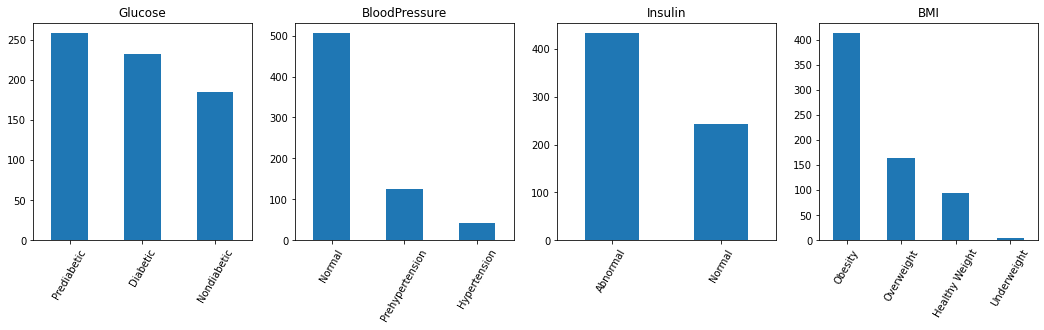

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(18,4))
for index, feature in enumerate(categorical_features):
  df[feature].value_counts().plot(kind='bar', ax=ax[index], rot=60, title=feature)
plt.show()  

#### Numerical Features

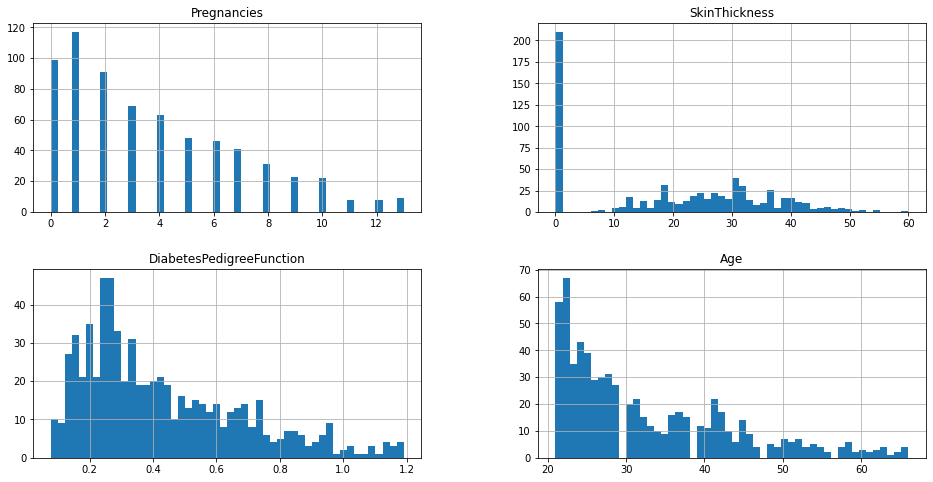

In [ ]:
df[numerical_features].hist(bins=50, figsize=(16,8))
plt.show()

### Multivariate Analysis

#### Categorical Features

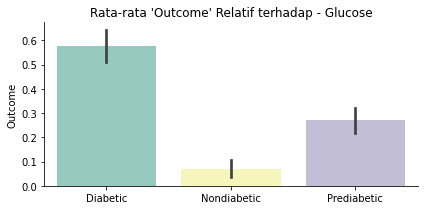

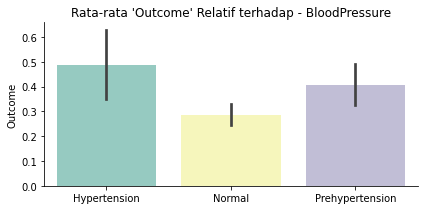

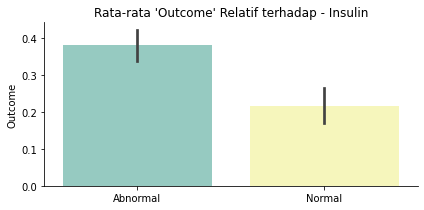

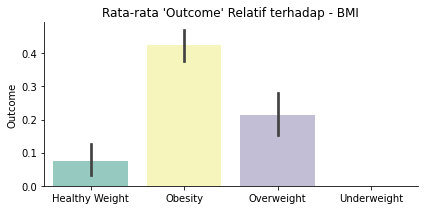

In [ ]:
for index, col in enumerate(categorical_features):
  sns.catplot(x=col, y='Outcome', kind='bar', dodge=False, height=3, aspect=6/3,  data=df, palette='Set3').set(xlabel=None)
  plt.title("Rata-rata 'Outcome' Relatif terhadap - {}".format(col))
plt.show()  

#### Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik')

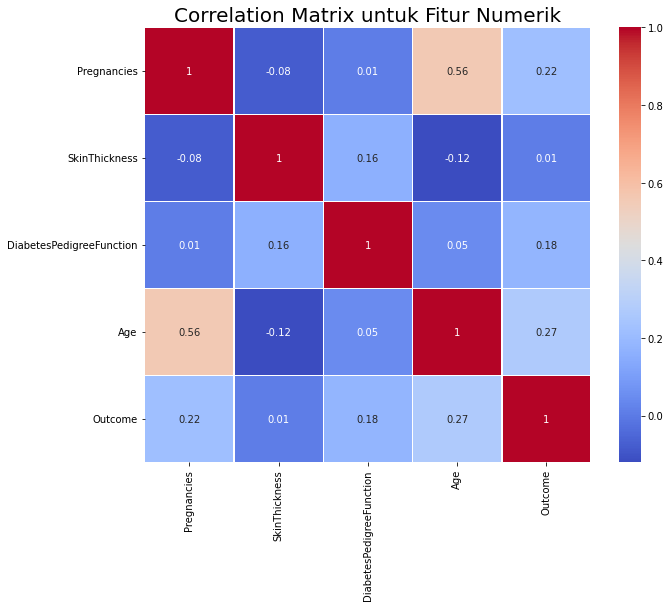

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix untuk Fitur Numerik', size=20)

Dapat dilihat data pada fitur `SkinThickness` memiliki korelasi yang lemah terhadap prediksi diabetes. Sehingga, fitur tersebut dapat dihapus.

In [ ]:
df.drop('SkinThickness', inplace=True, axis=1)
df.head()

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome,Glucose,BloodPressure,Insulin,BMI
0,6,0.627,50,1,Diabetic,Normal,Abnormal,Obesity
1,1,0.351,31,0,Nondiabetic,Normal,Abnormal,Overweight
2,8,0.672,32,1,Diabetic,Normal,Abnormal,Healthy Weight
3,1,0.167,21,0,Nondiabetic,Normal,Normal,Overweight
5,5,0.201,30,0,Prediabetic,Normal,Abnormal,Overweight


### Features Encoding

In [ ]:
df = pd.concat([df, pd.get_dummies(df['Glucose'], prefix='Glucose')], axis=1)
df = pd.concat([df, pd.get_dummies(df['BloodPressure'], prefix='BloodPressure')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Insulin'], prefix='Insulin')], axis=1)
df = pd.concat([df, pd.get_dummies(df['BMI'], prefix='BMI')], axis=1)
df.loc[df['Outcome'] == 0, 'Outcome'] = 'Negative'
df.loc[df['Outcome'] == 1, 'Outcome'] = 'Positive'

df.drop(['Glucose', 'BloodPressure', 'Insulin', 'BMI'], axis=1, inplace=True)
df.head()

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome,Glucose_Diabetic,Glucose_Nondiabetic,Glucose_Prediabetic,BloodPressure_Hypertension,BloodPressure_Normal,BloodPressure_Prehypertension,Insulin_Abnormal,Insulin_Normal,BMI_Healthy Weight,BMI_Obesity,BMI_Overweight,BMI_Underweight
0,6,0.627,50,Positive,1,0,0,0,1,0,1,0,0,1,0,0
1,1,0.351,31,Negative,0,1,0,0,1,0,1,0,0,0,1,0
2,8,0.672,32,Positive,1,0,0,0,1,0,1,0,1,0,0,0
3,1,0.167,21,Negative,0,1,0,0,1,0,0,1,0,0,1,0
5,5,0.201,30,Negative,0,0,1,0,1,0,1,0,0,0,1,0


In [ ]:
df.describe()

,Pregnancies,DiabetesPedigreeFunction,Age,Glucose_Diabetic,Glucose_Nondiabetic,Glucose_Prediabetic,BloodPressure_Hypertension,BloodPressure_Normal,BloodPressure_Prehypertension,Insulin_Abnormal,Insulin_Normal,BMI_Healthy Weight,BMI_Obesity,BMI_Overweight,BMI_Underweight
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,3.758519,0.426796,32.472593,0.343704,0.274074,0.382222,0.063704,0.749630,0.186667,0.641481,0.358519,0.139259,0.611852,0.242963,0.005926
std,3.251943,0.250690,10.926803,0.475296,0.446377,0.486291,0.244405,0.433548,0.389933,0.479921,0.479921,0.346474,0.487690,0.429191,0.076809
min,0.000000,0.078000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.238000,24.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.349000,29.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,6.000000,0.584500,39.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,13.000000,1.191000,66.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Split Dataset

In [ ]:
numerical_features = ['Pregnancies', 'DiabetesPedigreeFunction', 'Age']
X = df.drop(['Outcome'], axis =1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

X_train[numerical_features].describe().round(4)

,Pregnancies,DiabetesPedigreeFunction,Age
count,540.0000,540.0000,540.0000
mean,3.7704,0.4160,32.4278
std,3.2381,0.2466,10.7800
min,0.0000,0.0780,21.0000
25%,1.0000,0.2368,24.0000
50%,3.0000,0.3400,29.0000
75%,6.0000,0.5610,39.2500
max,13.0000,1.1820,66.0000


### Normalization

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])

X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_test[numerical_features]  = scaler.transform(X_test.loc[:, numerical_features])

X_train[numerical_features].describe().round(4)

,Pregnancies,DiabetesPedigreeFunction,Age
count,540.0000,540.0000,540.0000
mean,0.0000,-0.0000,0.0000
std,1.0009,1.0009,1.0009
min,-1.1655,-1.3717,-1.0611
25%,-0.8564,-0.7274,-0.7825
50%,-0.2381,-0.3083,-0.3183
75%,0.6892,0.5886,0.6334
max,2.8530,3.1089,3.1172


## Model Development

### K-Nearest Neighbor

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
knn_report = classification_report(y_test, y_pred, output_dict=True, target_names=['Negative', 'Positive'])

In [ ]:
knn_cm = confusion_matrix(y_test, y_pred)

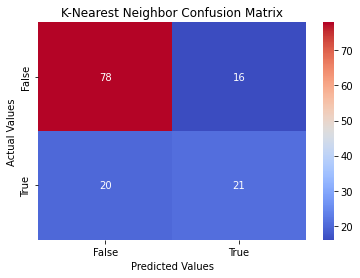

In [ ]:
ax = sns.heatmap(knn_cm, annot=True, cmap='coolwarm')
ax.set_title('K-Nearest Neighbor Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

### Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, n_estimators=50, n_jobs=-1,
                       random_state=55)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
rf_report = classification_report(y_test, y_pred, output_dict=True, target_names=['Negative', 'Positive'])

In [ ]:
rf_cm = confusion_matrix(y_test, y_pred)

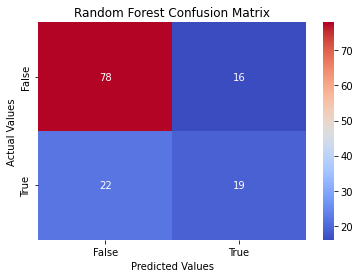

In [ ]:
ax = sns.heatmap(rf_cm, annot=True, cmap='coolwarm')
ax.set_title('Random Forest Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

### AdaBoost

In [ ]:
boosting = AdaBoostClassifier(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.05, random_state=55)

In [ ]:
y_pred = boosting.predict(X_test)

In [ ]:
boosting_report = classification_report(y_test, y_pred, output_dict=True, target_names=['Negative', 'Positive'])

In [ ]:
boosting_cm = confusion_matrix(y_test, y_pred)

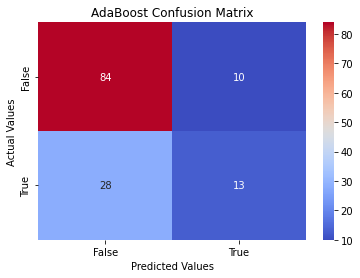

In [ ]:
ax = sns.heatmap(boosting_cm, annot=True, cmap='coolwarm')
ax.set_title('AdaBoost Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

### Model Report

In [ ]:
metrics = pd.DataFrame({'Accuracy': [knn_report['accuracy'], rf_report['accuracy'], boosting_report['accuracy']],
                       'F1-score_0': [knn_report['Negative']['f1-score'], rf_report['Negative']['f1-score'], boosting_report['Negative']['f1-score']], 
                       'F1-score_1': [knn_report['Positive']['f1-score'], rf_report['Positive']['f1-score'], boosting_report['Positive']['f1-score']],
                       'Precision_0': [knn_report['Negative']['precision'], rf_report['Negative']['precision'], boosting_report['Negative']['precision']], 
                       'Precision_1': [knn_report['Positive']['precision'], rf_report['Positive']['precision'], boosting_report['Positive']['precision']], 
                       'Recall_0': [knn_report['Negative']['recall'], rf_report['Negative']['recall'], boosting_report['Negative']['recall']], 
                       'Recall_1': [knn_report['Positive']['recall'], rf_report['Positive']['recall'], boosting_report['Positive']['recall']]},
                      index=['KNN', 'RandomForest', 'Boosting'])

metrics.columns = pd.MultiIndex.from_tuples([('','Accuracy'),
                                             ('Negative', 'F1-score'),
                                             ('Negative', 'Precision'),
                                             ('Negative', 'Recall'),
                                             ('Positive', 'F1-score'),
                                             ('Positive', 'Precision'),
                                             ('Positive', 'Recall')])

metrics

Negative                      Positive            \
              accuracy  F1-score Precision    Recall  F1-score Precision   
KNN           0.733333  0.812500  0.538462  0.795918  0.567568  0.829787   
RandomForest  0.718519  0.804124  0.500000  0.780000  0.542857  0.829787   
Boosting      0.718519  0.815534  0.406250  0.750000  0.565217  0.893617   

                        
                Recall  
KNN           0.512195  
RandomForest  0.463415  
Boosting      0.317073

## References
<ul>
  <li>
    <a id="ref1"></a>
    [1] Glucose Tolerance Testing: Reference Range, Interpretation, Collection and Panels [Internet]. Tersedia pada: <a href='https://emedicine.medscape.com/article/2049402-overview'>https://emedicine.medscape.com/article/2049402-overview</a>.
  </li>
  <li>
    <a id="ref2"></a>
    [2] About Adult BMI | Healthy Weight, Nutrition, and Physical Activity | CDC [Internet]. Tersedia pada: <a href='https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html#Interpreted'>https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html#Interpreted</a>.
  </li>
  <li>
    <a id="ref3"></a>
    [3] Insulin: Reference Range, Interpretation, Collection and Panels [Internet]. Tersedia pada: <a href='https://emedicine.medscape.com/article/2089224-overview'>https://emedicine.medscape.com/article/2089224-overview</a>.
  </li>
  <li>
    <a id="ref4"></a>
    [4] High Blood Pressure Symptoms and Causes | cdc.gov [Internet]. Tersedia pada: <a href='https://www.cdc.gov/bloodpressure/about.htm#whatare'> https://www.cdc.gov/bloodpressure/about.htm#whatare</a>.
  </li>
</ul>